<a href="https://colab.research.google.com/github/AuFeld/Project2/blob/master/notebooks/Project_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
DATA_PATH = 'Project_2_Data.xlsx'

In [0]:
!pip install category_encoders==2.*
!pip install pdpbox
!pip install shap
!pip install eli5
!pip install pandas-profiling==2.*

In [3]:
# import libraries
import pandas as pd
import pandas_profiling
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [0]:
df = pd.read_excel(DATA_PATH)

In [5]:
df.head()

,Club,Season,GW_Played,Goals_Scored,Goals_Conceded,Goal_Difference,Expenditure,Income,Net,Points,Points_per_GW,Expenditure_per_Point_per_GW,Manager,Owner,Champion,Relegated
0,LIV,2019,18,46,14,32,-2.17,47.42,45.25,49,2.722222,-0.797143,Klopp,Fenway,False,False
1,LEI,2019,19,41,18,23,-120.95,99.52,-21.43,39,2.052632,-58.924359,Rodgers,King_Power,False,False
2,MCI,2019,19,50,20,30,-191.52,78.66,-112.86,38,2.000000,-95.760000,Guardiola,City_Football,False,False
3,CHE,2019,19,33,27,6,-51.30,166.16,114.86,32,1.684211,-30.459375,Lampard,Abramovich,False,False
4,SHU,2019,19,23,17,6,-54.15,0.00,-54.15,28,1.473684,-36.744643,Wilder,Al_Saud,False,False


In [0]:
# choose your target. which column in will you predict? 
# target: 2019 Champion

In [0]:
# regression or classification?
# classification

In [0]:
# evaluation metrics: accuracy

In [0]:
columns = ['Club', 'Season', 'GW_Played', 'Goals_Scored', 'Goals_Conceded', 
           'Goal_Difference', 'Expenditure', 'Income', 'Net', 'Points', 
           'Points_per_GW', 'Expenditure_per_Point_per_GW', 'Manager', 'Owner', 
           'Champion', 'Relegated']

In [0]:
# split data by season

train = df[df['Season'] < 2018]
val = df[df['Season'] == 2018]
test = df[df['Season'] == 2019]

In [11]:
train.shape, val.shape, test.shape

((460, 16), (20, 16), (20, 16))

In [0]:
train.describe(exclude='number').T.sort_values(by='unique')

In [0]:
# null values?
df.isna().sum()

In [0]:
# assign variables
target = 'Champion'
features = df.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [0]:
# target distribution

In [0]:
y=df['Champion']

In [17]:
y.nunique()

2

In [18]:
y.value_counts(normalize=True).max()

0.952

In [0]:
# Features Importance

In [20]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.95


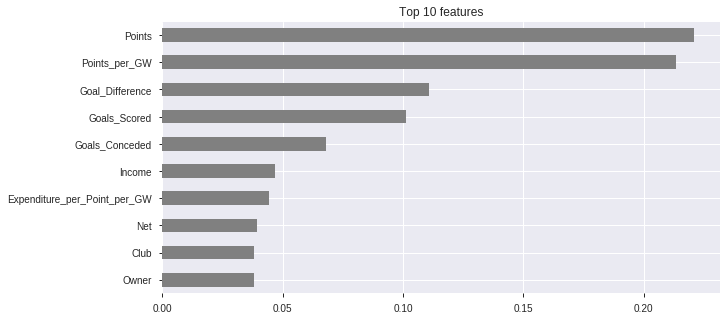

In [21]:
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# observation: Goals Scored has a higher importance re Champion

In [0]:
# The $125m question - RELEGATION

In [0]:
target = 'Relegated'
features = df.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [25]:
# target distribution

y=df['Relegated']
y.nunique()

2

In [26]:
y.value_counts(normalize=True).max()

0.856

In [0]:
# Features Importance

In [28]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 1.0


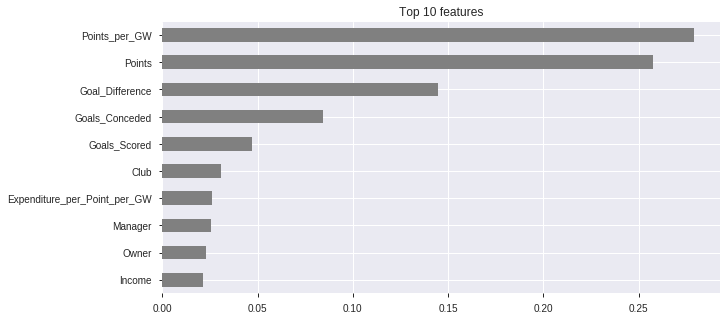

In [29]:

rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# observation: Goals Conceded (defense) has a higher importance re Relegation

"Richard Battle, senior manager in the sports group at Deloitte, stated that the main reason that playoff finals are worth so much is because of the rising TV broadcast deals in the Premier League. Furthermore, most of the rising payments has to also do with the rising financial gulf in the Premier League, with a team finishing in the bottom half of the table receiving £95m to £100m from TV money alone."